In [69]:
import libkloudtrader.stocks as stocks
import libkloudtrader.analysis as analysis
import libkloudtrader.crypto as crypto
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', -1)  # or 199

In [70]:
data=stocks.ohlcv('AAPL','2017-01-01','2019-08-19')

In [71]:
data.head(10)

,open,high,low,close,volume
date,,,,,
2017-01-03,115.800,116.3300,114.76,116.15,28781865
2017-01-04,115.850,116.5100,115.75,116.02,21118116
2017-01-05,115.920,116.8642,115.81,116.61,22193587
2017-01-06,116.780,118.1600,116.47,117.91,31751900
2017-01-09,117.950,119.4300,117.94,118.99,33561948
2017-01-10,118.770,119.3800,118.30,119.11,24462051
2017-01-11,118.740,119.9300,118.60,119.75,27588593
2017-01-12,118.895,119.3000,118.21,119.25,27086220
2017-01-13,119.110,119.6200,118.81,119.04,26111948


Text(0.5, 1.0, 'TSLA close price')

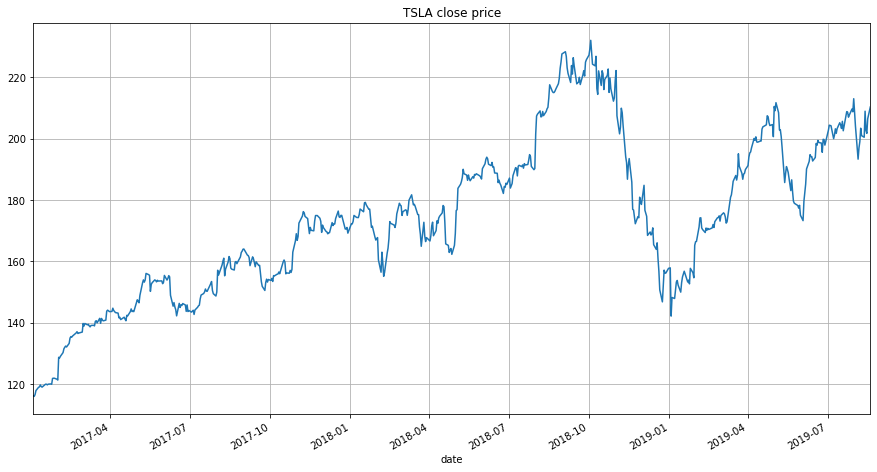

In [72]:
data['close'].plot(figsize=(15,8),grid=True)
plt.title('TSLA close price')

In [73]:
short_window=40
long_window=100

signals=pd.DataFrame(index=data.index)
signals['signal']=0.0
signals['short_mavg']=analysis.sma(data['close'],short_window)
signals['long_mavg']=analysis.sma(data['close'],long_window)
signals['signal'][short_window:]=np.where(signals['short_mavg'][short_window:]
                                               >signals['long_mavg'][short_window:],1,0)
signals['positions']=signals['signal'].diff()
print(signals.loc[signals['positions']==1.0])
print(signals.loc[signals['positions']==-1.0])

            signal  short_mavg  long_mavg  positions
date                                                
2017-05-25  1.0     147.28525   137.69995  1.0      
2018-04-06  1.0     172.25200   172.01210  1.0      
2019-03-22  1.0     174.24400   174.04530  1.0      
            signal  short_mavg  long_mavg  positions
date                                                
2018-03-19  0.0     171.67825   171.7609  -1.0      
2018-11-27  0.0     208.22675   209.3476  -1.0      


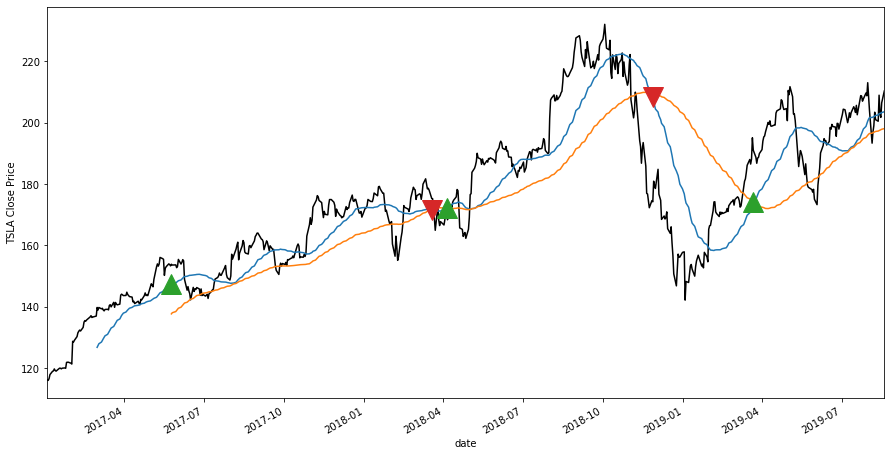

In [74]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(111,ylabel='TSLA Close Price')
data['close'].plot(ax=ax1,color='black')
signals['short_mavg'].plot(ax=ax1)
signals['long_mavg'].plot(ax=ax1)
ax1.plot(signals.loc[signals['positions']==1.0].index,signals.short_mavg[signals.positions==1.0],'^',markersize=20)
ax1.plot(signals.loc[signals['positions']==-1.0].index,signals.short_mavg[signals.positions==-1.0],'v',markersize=20)

In [75]:
initial_capital=float(100000)
positions=pd.DataFrame(index=signals.index).fillna(0.0)
positions['Positions in TSLA']=1000*signals['signal']
portfolio=positions.multiply(data['close'],axis=0)
pos_diff=positions.diff()
portfolio['holdings']=(positions.multiply(data['close'],axis=0).sum(axis=1))
portfolio['cash']=initial_capital-(pos_diff.multiply(data['close'],axis=0)).sum(axis=1).cumsum()
portfolio['total']=portfolio['cash']+portfolio['holdings']
portfolio['returns']=portfolio['total'].pct_change()
portfolio.tail(10)

,Positions in TSLA,holdings,cash,total,returns
date,,,,,
2019-08-06,197000.0,197000.0,-63760.0,133240.0,0.028245
2019-08-07,199040.0,199040.0,-63760.0,135280.0,0.015311
2019-08-08,203430.0,203430.0,-63760.0,139670.0,0.032451
2019-08-09,200990.0,200990.0,-63760.0,137230.0,-0.017470
2019-08-12,200480.0,200480.0,-63760.0,136720.0,-0.003716
2019-08-13,208970.0,208970.0,-63760.0,145210.0,0.062098
2019-08-14,202750.0,202750.0,-63760.0,138990.0,-0.042835
2019-08-15,201740.0,201740.0,-63760.0,137980.0,-0.007267
2019-08-16,206500.0,206500.0,-63760.0,142740.0,0.034498


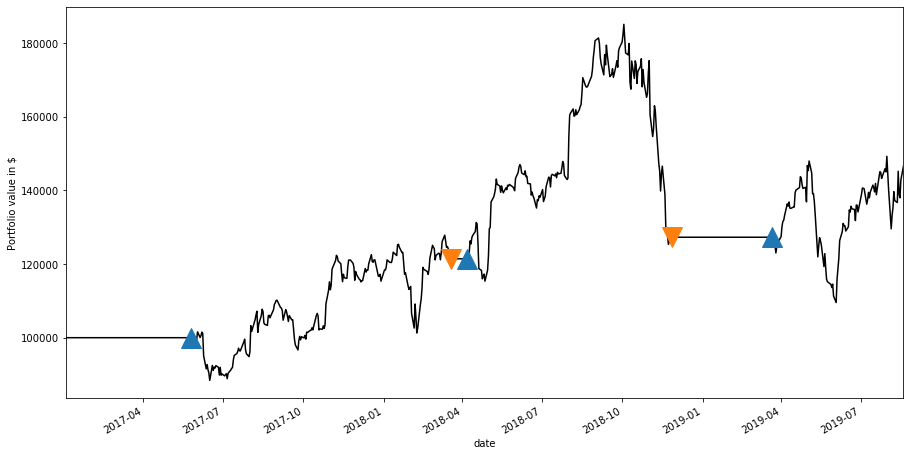

In [79]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(111,ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1,color='black')
ax1.plot(portfolio.loc[signals['positions']==1.0].index,portfolio.total[signals.positions==1.0],'^',markersize=20)
ax1.plot(portfolio.loc[signals['positions']==-1.0].index,portfolio.total[signals.positions==-1.0],'v',markersize=20)

In [77]:
now = portfolio['total'].tail(1)
absolute = ((now/float(100000))-float(1))*100
print('Portfolio value as of today: {}'.format(now))
print('Strategy/Portfolio absolute returns {}%'.format(absolute))

Portfolio value as of today: date
2019-08-19    146590.0
Name: total, dtype: float64
Strategy/Portfolio absolute returns date
2019-08-19    46.59
Name: total, dtype: float64%


In [78]:
analysis.sharpe_ratio(portfolio['total'],stocks.ohlcv('SPY'))

TypeError: ohlcv() missing 2 required positional arguments: 'start' and 'end'